# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Applied Data Science Capstone by IBM/Coursera

## 1. Introduction: Business Problem

**Background:** 
Washington D.C., formally known as the District of Columbia, is the capital of the United States. Also, it is a cosmopolitan city with a variety of opportunities and pleasures that attract residents from all over the world. The city’s population is 601,723 and it’s very diverse, with only 38.5% white people consisting of the total population. When someone thinks of Washington D.C., the first things come to his or her mind in addition to politics must be the monuments and museums, national landmarks, musical and theatrical entertainment and sporting events. However, the high living cost there might concern people. Therefore, I’d like to provide potential residents with information on both prices and venues in different neighborhoods in Washington DC, so that they can make more informed decision in where to live. 

**Two objectives:**
  First, I will build a regression model based on data collected to identity factors that play an important role in determining house prices in Washington D.C. Second, I will create a map which shows average house price and most common venues for each neighborhood. The map is a more intuitive tool for users to learn different neighborhoods. 

**People who might be interested:**
People who want to buy or sell a house in Washington D.C. would be very interested. Also, realtors could use my regression model to price their properties. Visitors and travelers can also refer to my report to decide which neighborhood they want to stay.

## 2. Date

**Data source:**
The dataset I used is called “DC_Properties_data”. I downloaded it from Kaggle, https://www.kaggle.com/christophercorrea/dc-residential-properties. According to the author, the data is available at Open Data D.C. The residential property descriptions and geographic information is as lastest as July 2018, which increases the useability of the report to the current readers. 

**Description of the dataset:**
With target variable 'Price' included, there are in total 49 variables and 158957 records. The independent variables are almost physical features of a house or a building where a home is, such as number of bedrooms, number of units, and exterior wall categories. Also, there are a few columns that describe the location of a house, such as neighborhood, quadrant, and latitude/longitude. 

**How the data will be used to solve my problem:**
First, I will do data wrangling to make it cleaner and more appropriate for the downstream analytics process. Next, I will conduct the exploratory data analysis. In EDA part, I will do data visualization to show the relationships between features and house prices. Furthermore, an appropriate feature selection method will be implemented to reduce the number of features that go into my regression model to avoid the risk of overfitting. After data is ready, a regression model will be built. In the end, with the help of folium library and FourSquare API, I will create a map to show the average house price and most common venues in different neighborhoods. Neighborhoods will be clustered and be marked with different colors on the map. So, the users can easily identify neighborhoods that are similar to each other and that are different from themselves in other clusters.

###   

# Import Data and Libraries

In [494]:
import numpy as np
import pandas as pd
df = pd.read_csv('DC_Properties.csv')
import warnings; 
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from string import ascii_letters
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Let us take a look at the df.

In [495]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


# Data Cleaning

The next step is to clean the dataset to make it more appropriate for further analysis.

In [496]:
#Turn all column names into lower case so that they are more readible 
df.columns = map(str.lower, df.columns)
#Turn all 'No data' and 'Default' into NA 
df.replace('No Data', np.nan, inplace=True)
df['cndtn'].replace('Default', np.nan, inplace=True)

In [497]:
#drop columns:
df.drop('unnamed: 0',axis=1,inplace=True) #useless index column
df.drop('qualified',axis=1,inplace=True) #only two values in 'qualified', no clue about what 'U' and 'Q' means.
df.drop('gis_last_mod_dttm',axis=1,inplace=True)
df.drop('cmplx_num',axis=1,inplace=True) #67% records are null
df.drop('living_gba',axis=1,inplace=True) #67% records are null
df.drop('yr_rmdl',axis=1,inplace=True) #3/5 values are empty values
#full address will cause overfitting in modeling. we will use neighborhood info. 
df.drop('fulladdress',axis=1,inplace=True)
df.drop('nationalgrid',axis=1,inplace=True) #same as fulladdress
df.drop('zipcode',axis=1,inplace=True) #same as fulladdress
df.drop('census_tract',axis=1,inplace=True) #same as fulladdress
df.drop('census_block',axis=1,inplace=True) #same as fulladdress
df.drop('ward',axis=1,inplace=True) #same as fulladdress
#X and y are the longitude and latitude of eight wards in Washington DC.
df.drop('x',axis=1,inplace=True) 
df.drop('y',axis=1,inplace=True) 
df.drop('source',axis=1,inplace=True) #all records' sources are residential
df.drop('city',axis=1,inplace=True) #all are in Washington DC
df.drop('state',axis=1,inplace=True) #all are in Washington DC
df.drop('assessment_subnbhd',axis=1,inplace=True) #same as fulladdress
df.drop('square',axis=1,inplace=True) #no clues about what squares are 
df.drop('heat',axis=1,inplace=True) #After I converted all kinds of heat system into ‘yes’, I found there is no ‘No’ records, which suggests the feature isn’t informative. 

In [498]:
#drop rows with at least one NA
df.dropna(inplace=True)

In [499]:
#change column values
df.loc[df['ac']=='N','ac'] = 0 #from yes and no to 1 and 0
df.loc[df['ac']=='Y','ac'] = 1
#convert grade into 4 ordinal categories
#3: 'very good', 'excellent', 'superior', 'exceptional-A'
#2: 'good quality', 'exceptional B', 'above average'
#1: 'average','fair quality','exceptional C'
#0: 'low quality', 'exceptional D'
df.loc[df['grade'] == 'Very Good','grade']=3
df.loc[df['grade'] == 'Excellent','grade']=3
df.loc[df['grade'] == 'Superior','grade']=3
df.loc[df['grade'] == 'Exceptional-A','grade']=3
df.loc[df['grade'] == 'Good Quality','grade']=2
df.loc[df['grade'] == 'Exceptional-B','grade']=2
df.loc[df['grade'] == 'Above Average','grade']=2
df.loc[df['grade'] == 'Average','grade']=1
df.loc[df['grade'] == 'Fair Quality','grade']=1
df.loc[df['grade'] == 'Exceptional-C','grade']=1
df.loc[df['grade'] == 'Low Quality','grade']=0
df.loc[df['grade'] == 'Exceptional-D','grade']=0
#convert condition into 4 ordinal categories as well
#3: 'Excellent','Very Good'
#2: 'Good'
#1: 'Fair','Average'
#0: 'Poor'
df.loc[df['cndtn'] == 'Excellent','cndtn']=3
df.loc[df['cndtn'] == 'Very Good','cndtn']=3
df.loc[df['cndtn'] == 'Good','cndtn']=2
df.loc[df['cndtn'] == 'Average','cndtn']=1
df.loc[df['cndtn'] == 'Fair','cndtn']=1
df.loc[df['cndtn'] == 'Poor','cndtn']=0
#transform saledate into sale year and sale month and drop saledate 
df['saleyear'] = df['saledate'].dt.year
df['salemonth'] = df['saledate'].dt.month
df['salemonth']= df['salemonth'].astype(str)
df['saleyear']=df['saleyear'].astype(str)
df.drop('saledate',axis=1,inplace=True) 

In [500]:
#Revise some variables' data types
df['num_units']=df['num_units'].astype(int)
df['stories']=df['stories'].astype(int)
df['bldg_num']=df['bldg_num'].astype(int)
df['ayb']=df['ayb'].astype(str)
df['eyb']=df['eyb'].astype(str)
df['grade']=df['grade'].astype(int)
df['cndtn']=df['cndtn'].astype(int)
df['kitchens']=df['kitchens'].astype(int)
df['usecode']=df['usecode'].astype(str)

**Remove outliers in price column.**

Text(0.5,1,'Before Removing Outliers')

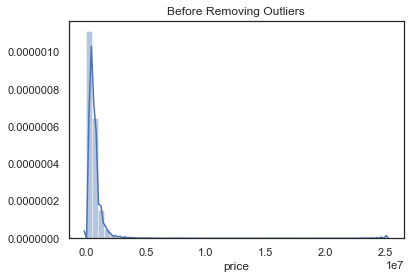

In [501]:
#Before removing outliers
sns.distplot(df['price'])
plt.title('Before Removing Outliers')

In [502]:
#IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR))|(df['price'] > (Q3 + 1.5 * IQR)))]
print(Q1 - 1.5 * IQR)
print(Q3 + 1.5 * IQR)

-525000.0
1515000.0


Text(0.5,1,'After Removing Outliers')

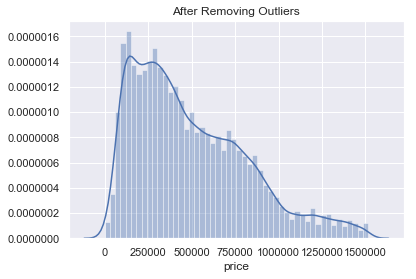

In [481]:
sns.distplot(df['price'])
plt.title('After Removing Outliers')

# Exploratory Data Analysis

**1. more restrooms, higher price.**

Text(0.5,1,'Price vs. Number of Bathroom')

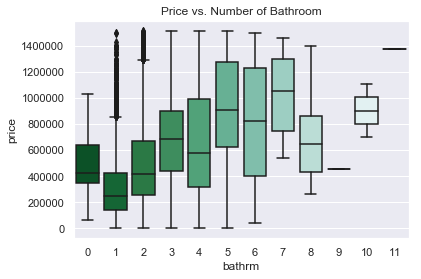

In [482]:
sns.boxplot(x="bathrm",y="price",data=df,palette='BuGn_r')
plt.title('Price vs. Number of Bathroom')

**2. Having AC in house suggests higher price.**

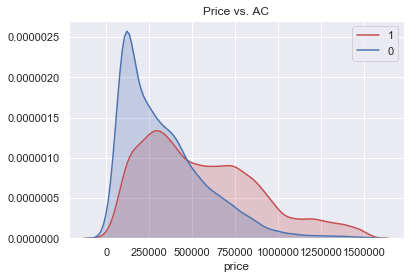

In [483]:
sns.distplot(df[df['ac']==1]['price'],color='r',label='1',
             hist=False,kde_kws={"shade": True})
sns.distplot(df[df['ac']==0]['price'],label='0',
             hist=False,kde_kws={"shade": True})

plt.title('Price vs. AC')
plt.legend()

**3. In the past 10 years, house price rises about 50%.**

Text(0.5,1,'Price vs. Sale Year')

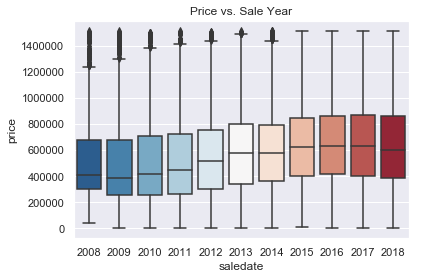

In [484]:
sns.set(style = 'darkgrid')
recent_year = 2018
df_temp = df.loc[(df['saledate'].dt.year>=(recent_year-10)) & (df['saledate'].dt.year<=recent_year),('saledate','price')]
sns.boxplot(y="price",x=df_temp["saledate"].dt.year,data=df_temp,palette="RdBu_r")
plt.title('Price vs. Sale Year')

**4. As expected, higher grade/better condition, higher price.**

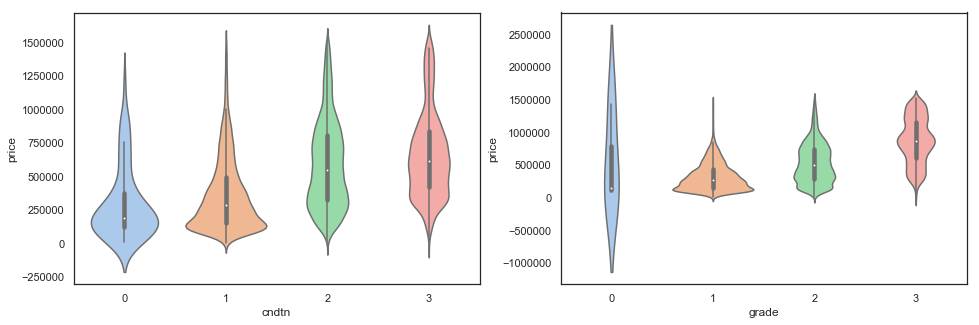

In [377]:
#plt.figure(figsize=(12,5))
#sns.boxplot(x="cndtn",y="price",data=df,palette='BuGn_r')
f, axes = plt.subplots(1, 2, figsize=(16,5))

sns.set(style = 'darkgrid')
sns.violinplot(y="price",x="cndtn",data=df,palette="pastel",ax=axes[0])
sns.violinplot(y="price",x="grade",data=df,palette="pastel",ax=axes[1])

**5. Relationship between grade, quandrant and price.**

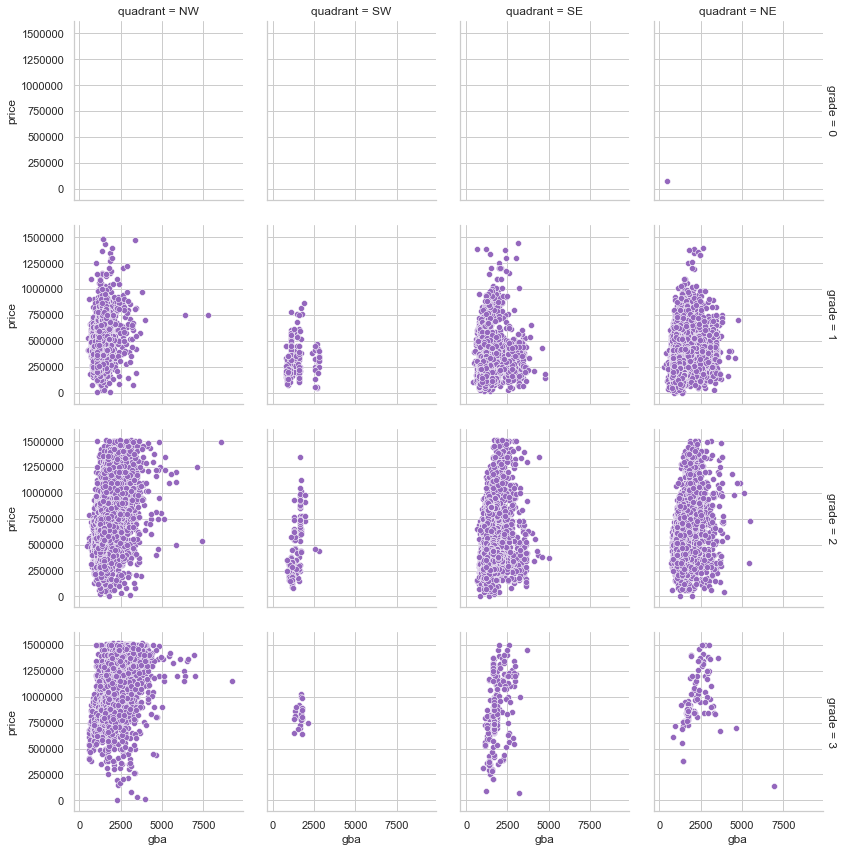

In [340]:
sns.set(style="whitegrid")
recent_year = 2018
df_temp = df.loc[(df['saledate'].dt.year>=(recent_year-10)) & (df['saledate'].dt.year<=recent_year),('saledate','price','quadrant','gba','grade')]

g=sns.FacetGrid(df_temp,row='grade',col='quadrant',margin_titles=True)
g.map(plt.scatter,"gba","price",color="#9467bd", edgecolor="white", lw=.5)
g.add_legend()

# Feature Selection for Regression Model

### Method 1: Plotting a diagonal correlation matrix

select out features that are most correlated to output variable.
also make sure remainning independent variables need to be uncorrelated with each other.

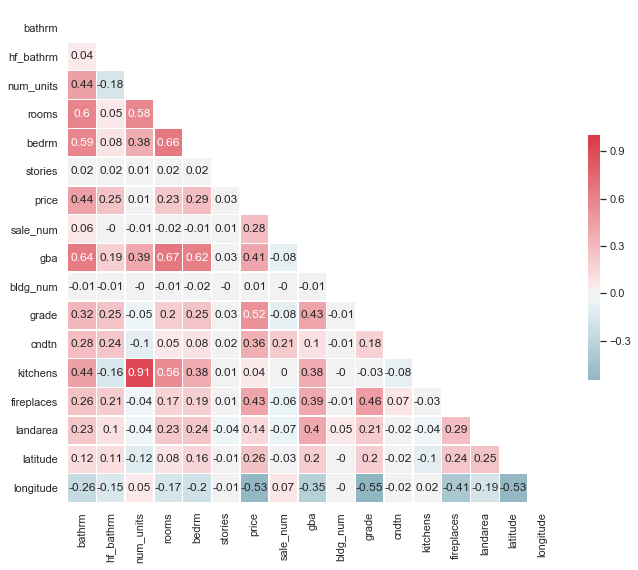

In [486]:
sns.set(style="white")
# Compute the correlation matrix
corr = round(df.corr(),2)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

According the above matrix, **numeric** variables for modeling: 'bathrm','grade','gba','cndtn','fireplaces','longitude'

In [346]:
#Test for multicolinearity：no multicolinearit, because no correlation is greater than 0.8
print(df[['bathrm', 'grade', 'gba','cndtn','fireplaces', 'longitude']].corr())

              bathrm     grade       gba     cndtn  fireplaces  longitude
bathrm      1.000000  0.322320  0.642247  0.282555    0.260129  -0.256636
grade       0.322320  1.000000  0.426708  0.177345    0.460041  -0.551093
gba         0.642247  0.426708  1.000000  0.096111    0.392748  -0.354606
cndtn       0.282555  0.177345  0.096111  1.000000    0.065341  -0.018740
fireplaces  0.260129  0.460041  0.392748  0.065341    1.000000  -0.414258
longitude  -0.256636 -0.551093 -0.354606 -0.018740   -0.414258   1.000000


### Method 2: Backward Elimination

Correlation matrix only shows the correlationship between numeric variables
and target variable. We need a more robust method to examine relationship
between categorical variables and target variables.

In [366]:
X = df.drop(['price','hf_bathrm','num_units','rooms','bedrm','stories',
            'sale_num','bldg_num','kitchens','landarea','latitude'],1)
y = df['price']

In [369]:
X = pd.get_dummies(X) #one hot encoding categorical variables.

In [372]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const            1.450950e-180
bathrm           4.701469e-205
gba               0.000000e+00
grade            1.425871e-107
cndtn             0.000000e+00
fireplaces       3.248100e-192
longitude        1.130385e-180
ac_0             1.323582e-180
ac_1             1.590886e-180
ayb_1765.0        1.679820e-06
ayb_1776.0        2.580468e-08
ayb_1780.0        5.068203e-04
ayb_1790.0        1.440826e-04
ayb_1800.0        9.564184e-12
ayb_1801.0        5.481211e-05
ayb_1802.0        6.888243e-04
ayb_1803.0        7.978551e-03
ayb_1805.0        2.135774e-07
ayb_1810.0        7.212162e-11
ayb_1812.0        7.438843e-09
ayb_1813.0        8.595253e-02
ayb_1815.0        1.302022e-04
ayb_1818.0        7.038071e-03
ayb_1819.0        5.044137e-07
ayb_1820.0        1.217916e-20
ayb_1822.0        1.074744e-03
ayb_1825.0        2.909948e-10
ayb_1830.0        1.383743e-28
ayb_1833.0        1.910767e-04
ayb_1834.0        1.313894e-02
                     ...      
saleyear_2001    1.475857e-189
saleyear

In [373]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bathrm', 'gba', 'grade', 'cndtn', 'fireplaces', 'longitude', 'ac_0', 'ac_1', 'ayb_1819.0', 'ayb_1820.0', 'ayb_1846.0', 'ayb_1864.0', 'ayb_1869.0', 'ayb_1880.0', 'ayb_1890.0', 'ayb_1895.0', 'ayb_1896.0', 'ayb_1900.0', 'ayb_1903.0', 'ayb_1904.0', 'ayb_1905.0', 'ayb_1906.0', 'ayb_1907.0', 'ayb_1908.0', 'ayb_1909.0', 'ayb_1910.0', 'ayb_1911.0', 'ayb_1912.0', 'ayb_1913.0', 'ayb_1914.0', 'ayb_1915.0', 'ayb_1916.0', 'ayb_1917.0', 'ayb_1918.0', 'ayb_1920.0', 'ayb_1921.0', 'ayb_1922.0', 'ayb_1923.0', 'ayb_1924.0', 'ayb_1925.0', 'ayb_1926.0', 'ayb_1927.0', 'ayb_1928.0', 'ayb_1929.0', 'ayb_1930.0', 'ayb_1931.0', 'ayb_1932.0', 'ayb_1933.0', 'ayb_1934.0', 'ayb_1935.0', 'ayb_1936.0', 'ayb_1937.0', 'ayb_1938.0', 'ayb_1939.0', 'ayb_1940.0', 'ayb_1941.0', 'ayb_1942.0', 'ayb_1943.0', 'ayb_1944.0', 'ayb_1945.0', 'ayb_1946.0', 'ayb_1947.0', 'ayb_1948.0', 'ayb_1949.0', 'ayb_1950.0', 'ayb_1951.0', 'ayb_1952.0', 'ayb_1953.0', 'ayb_1954.0', 'ayb_1955.0', 'ayb_1956.0', 'ayb_1957.0', 'ayb_1958.0', 'ayb_1959.0

According to the above output, variables of the final set for modelling are **bathrm, fireplaces, longitude, ac, ayb, yr_rmdl, eyb, style, grade, cndtn, extwall, roof, intwall, usecode, assessment_nbhd, quadrant, saleyear, salemonth**

# Modelling

## Train/Test Split 

To avoid overfitting, dataset will be split into train and test set. Traning set will be used to train model and test set will be used to evaluate model's out-pf-sample performance. 

In [378]:
X = df[['bathrm', 'gba', 'grade','cndtn', 'fireplaces', 'longitude','ac', 'ayb', 'eyb', 
       'style', 'struct', 'extwall','roof','intwall','usecode', 'assessment_nbhd', 
       'quadrant','saledate']]
y = df['price']
X = pd.get_dummies(X)
X = X.values

In [379]:
#Usually a dataset contains variables that are different in scale.
#they need to be Standardized to have common scale while building machine learning model.
#StandardScaler() will normalize the features (each column of X, individually) so that each column/feature/variable will have mean = 0 and standard deviation = 1.
X = preprocessing.StandardScaler().fit(X).transform(X) 

In [380]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [381]:
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)

(38393, 471)
(38393,)
(16455, 471)
(16455,)


## Regression Modelling

In [382]:
#building model with training dataset
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [383]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [  2.86511972e+04   5.39742337e+04   2.96492822e+04   3.74724747e+04
   2.39517587e+04  -1.29952704e+05   6.09218852e+17   6.09218852e+17
  -2.15988796e+15  -3.05451500e+15  -2.15988796e+15  -3.05451500e+15
  -6.82960502e+15  -2.15988796e+15  -2.15988796e+15  -2.15988796e+15
  -3.05451500e+15  -5.71421382e+15  -3.05451500e+15  -2.15988796e+15
  -2.15988796e+15  -2.15988796e+15  -2.15988796e+15  -5.29038224e+15
  -2.15988796e+15  -3.74096747e+15  -7.78673481e+15  -2.15988796e+15
  -2.15988796e+15  -2.15988796e+15  -6.82960502e+15  -2.15988796e+15
  -2.15988796e+15  -2.15988796e+15  -2.15988796e+15  -2.15988796e+15
  -9.89604527e+15  -2.15988796e+15  -2.15988796e+15  -3.74096747e+15
  -2.15988796e+15  -5.71421382e+15  -2.15988796e+15  -2.15988796e+15
  -9.16220827e+15  -3.05451500e+15  -3.05451500e+15  -3.74096747e+15
  -9.41318832e+15  -2.15988796e+15  -2.15988796e+15  -2.13628841e+16
  -4.82948018e+15  -4.31965777e+15  -3.05451500e+15  -1.20224579e+16
  -4.82948018e+15 

In [384]:
#model evaluation
y_hat= regr.predict(X_testset)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_testset) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % regr.score(X_testset, y_testset))

Residual sum of squares: 19632002355.66
Variance score: 0.8208


## Import libraries required for mapping

In [421]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Get the latitude and longitude of Washington DC

In [422]:
neighborhoods = df.groupby('assessment_nbhd', as_index=False).agg({"longitude":"mean","latitude":"mean","price":"mean"})
neighborhoods.rename(columns={"assessment_nbhd":"Neighborhood",
                      "longitude":"Longitude","latitude":"Latitude","price":"Price"},inplace=True)

Use geolibrary to get the latitude and longitude values of Washington DC. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [423]:
address = 'Washington DC'

geolocator = Nominatim(user_agent="dc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington DC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Washington DC are 38.8950092, -77.0365625.


## Create a map of Washington DC with neighborhoods superimposed on top

In [424]:
# create map of Washington DC using latitude and longitude values
map_dc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, avg_house_price in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood'], neighborhoods['Price']):
    label = '{}, Avg House Price: ${}'.format(neighborhood, round(avg_house_price))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dc)  
    
map_dc

## Define Foursquare Credentials and Version 

In [425]:
CLIENT_ID = 'VPLTQDZPMTCNJL3EZDDU4EM1YTDC3UEZR4BF1VGGXOWXTVUW' # your Foursquare ID
CLIENT_SECRET = 'WXGF0TS3BZNCIPULGJIGPADABOTHRHELULNW0LKXQPHCM1BK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VPLTQDZPMTCNJL3EZDDU4EM1YTDC3UEZR4BF1VGGXOWXTVUW
CLIENT_SECRET:WXGF0TS3BZNCIPULGJIGPADABOTHRHELULNW0LKXQPHCM1BK


## Let's explore venues in all neighborhoods

In [426]:
LIMIT = 100 
radius = 500 

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called dc_venues.

In [427]:
dc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

16th Street Heights
American University
Anacostia
Barry Farms
Berkley
Brentwood
Brightwood
Brookland
Burleith
Capitol Hill
Central-tri 1
Chevy Chase
Chillum
Cleveland Park
Colonial Village
Columbia Heights
Congress Heights
Crestwood
Deanwood
Eckington
Foggy Bottom
Forest Hills
Fort Dupont Park
Fort Lincoln
Foxhall
Garfield
Georgetown
Glover Park
Hawthorne
Hillcrest
Kalorama
Kent
Ledroit Park
Lily Ponds
Marshall Heights
Massachusetts Avenue Heights
Michigan Park
Mt. Pleasant
North Cleveland Park
Observatory Circle
Old City 1
Old City 2
Palisades
Petworth
Randle Heights
Riggs Park
Shepherd Heights
Southwest Waterfront
Spring Valley
Takoma Park
Trinidad
Wakefield
Wesley Heights
Woodley
Woodridge


Let us check how many venues were returned for each neighborhoods

In [428]:
dc_venues.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(dc_venues['Venue Category'].unique())))

There are 223 uniques categories.


## Analyze each neighborhood

In [429]:
# one hot encoding
dc_onehot = pd.get_dummies(dc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dc_onehot['Neighborhood'] = dc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dc_onehot.columns[-1]] + list(dc_onehot.columns[:-1])
dc_onehot = dc_onehot[fixed_columns]

dc_onehot.head()

,Zoo Exhibit,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bike Rental / Bike Share,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Residence Hall,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Laundromat,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Student Center,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16th Street Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16th Street Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [430]:
dc_grouped = dc_onehot.groupby('Neighborhood').mean().reset_index()

Let's build a function to display the most common vanues for each neighborhood.

In [432]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [433]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dc_grouped['Neighborhood']

for ind in np.arange(dc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,16th Street Heights,Pharmacy,Bus Stop,Diner,Coffee Shop,Park,Fried Chicken Joint,Café,Zoo,Dry Cleaner,Fast Food Restaurant
1,Anacostia,Art Gallery,Intersection,Bank,History Museum,Fast Food Restaurant,American Restaurant,Convenience Store,Sandwich Place,Café,Market
2,Barry Farms,Spa,Convenience Store,Home Service,Gym,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
3,Berkley,Pizza Place,Café,Coffee Shop,Farmers Market,Pharmacy,Mediterranean Restaurant,Museum,Sushi Restaurant,Food Court,Seafood Restaurant
4,Brentwood,Cosmetics Shop,Diner,Bus Station,Sporting Goods Shop,Sports Bar,Seafood Restaurant,Brewery,Sandwich Place,Liquor Store,Food Truck
5,Brightwood,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Gas Station,Mobile Phone Shop,South American Restaurant,Café,Massage Studio,Laundromat
6,Brookland,Spa,Grocery Store,Bar,Sandwich Place,Art Gallery,Coffee Shop,American Restaurant,Pharmacy,Latin American Restaurant,Burger Joint
7,Burleith,Deli / Bodega,Park,Bagel Shop,Dog Run,Zoo,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
8,Capitol Hill,Chinese Restaurant,Pizza Place,Bookstore,Bar,Coffee Shop,American Restaurant,Spa,Breakfast Spot,Park,Taco Place
9,Central-tri 1,Hotel,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Taco Place,Gym,Hotel Bar,Thai Restaurant,American Restaurant


## Cluster Neighborhoods

Run k-means to cluster the neighborhood into 4 clusters.

In [434]:
dc_grouped=neighborhoods.merge(dc_grouped, left_on='Neighborhood',right_on='Neighborhood')
dc_grouped

,Neighborhood,Longitude,Latitude,Price,Zoo Exhibit,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bike Rental / Bike Share,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Residence Hall,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Laundromat,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Student Center,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,16th Street Heights,-77.032288,38.951630,534511.924492,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.142857,0.00000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.142857,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.142857,0

In [435]:
# set number of clusters
kclusters = 4

dc_grouped_clustering = dc_grouped.drop(['Neighborhood','Longitude','Latitude'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:4] 

array([2, 0, 0, 1], dtype=int32)

Let's create a new dataframe that includes neighborhoods' average house price as well as the top 10 venues for each neighborhood.

In [436]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dc_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dc_merged = dc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dc_merged.head() # check the last columns!

,Neighborhood,Longitude,Latitude,Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,16th Street Heights,-77.032288,38.951630,534511.924492,2.0,Pharmacy,Bus Stop,Diner,Coffee Shop,Park,Fried Chicken Joint,Café,Zoo,Dry Cleaner,Fast Food Restaurant
1,American University,-77.088954,38.949308,750045.296296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anacostia,-76.983328,38.866473,235008.067189,0.0,Art Gallery,Intersection,Bank,History Museum,Fast Food Restaurant,American Restaurant,Convenience Store,Sandwich Place,Café,Market
3,Barry Farms,-76.989398,38.858660,213457.317708,0.0,Spa,Convenience Store,Home Service,Gym,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
4,Berkley,-77.091546,38.918294,985608.541176,1.0,Pizza Place,Café,Coffee Shop,Farmers Market,Pharmacy,Mediterranean Restaurant,Museum,Sushi Restaurant,Food Court,Seafood Restaurant


Finally, let's visualize the resulting clusters

In [437]:
dc_merged.dropna(inplace=True)
dc_merged['Cluster Labels']=dc_merged['Cluster Labels'].astype(int)

In [438]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price, venue1, venue2, venue3 in zip(dc_merged['Latitude'], dc_merged['Longitude'], 
                                         dc_merged['Neighborhood'], dc_merged['Cluster Labels'], 
                                         dc_merged['Price'], dc_merged['1st Most Common Venue'],
                                        dc_merged['2nd Most Common Venue'],dc_merged['3rd Most Common Venue']):
    label = folium.Popup('{}, Avg House Price: ${}, Top 3 Venues: 1.{}, 2.{}, 3.{}'.format(str(poi),round(price),venue1,venue2,venue3), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [439]:
dc_merged.head()

,Neighborhood,Longitude,Latitude,Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,16th Street Heights,-77.032288,38.951630,534511.924492,2,Pharmacy,Bus Stop,Diner,Coffee Shop,Park,Fried Chicken Joint,Café,Zoo,Dry Cleaner,Fast Food Restaurant
2,Anacostia,-76.983328,38.866473,235008.067189,0,Art Gallery,Intersection,Bank,History Museum,Fast Food Restaurant,American Restaurant,Convenience Store,Sandwich Place,Café,Market
3,Barry Farms,-76.989398,38.858660,213457.317708,0,Spa,Convenience Store,Home Service,Gym,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
4,Berkley,-77.091546,38.918294,985608.541176,1,Pizza Place,Café,Coffee Shop,Farmers Market,Pharmacy,Mediterranean Restaurant,Museum,Sushi Restaurant,Food Court,Seafood Restaurant
5,Brentwood,-76.985636,38.917496,271076.838863,0,Cosmetics Shop,Diner,Bus Station,Sporting Goods Shop,Sports Bar,Seafood Restaurant,Brewery,Sandwich Place,Liquor Store,Food Truck


Text(0,0.5,'Number of Venue')

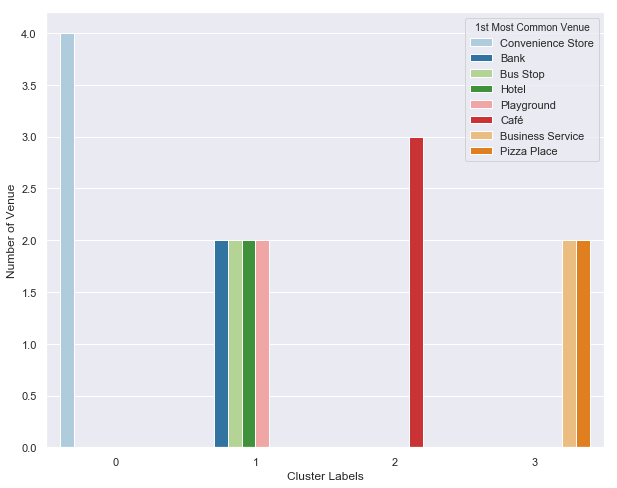

In [454]:
## calculate the number of each 1st most common venue in each cluster
dc_temp = dc_merged.groupby(['Cluster Labels','1st Most Common Venue'], as_index=False).agg({"Neighborhood":"count"})
dc_temp=dc_temp[dc_temp['Neighborhood']>1]
dc_temp
plt.figure(figsize=(10,8))
ax=sns.barplot(data=dc_temp, x='Cluster Labels',y='Neighborhood',hue='1st Most Common Venue',palette="Paired")
ax.set_ylabel("Number of Venue")

In [455]:
#Output the table of cluster 1
dc_merged.loc[dc_merged['Cluster Labels'] == 0, dc_merged.columns[[3] + list(range(5, dc_merged.shape[1]))]]

,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,235008.067189,Art Gallery,Intersection,Bank,History Museum,Fast Food Restaurant,American Restaurant,Convenience Store,Sandwich Place,Café,Market
3,213457.317708,Spa,Convenience Store,Home Service,Gym,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
5,271076.838863,Cosmetics Shop,Diner,Bus Station,Sporting Goods Shop,Sports Bar,Seafood Restaurant,Brewery,Sandwich Place,Liquor Store,Food Truck
16,212140.407664,Costume Shop,Bus Stop,Park,Basketball Court,Baseball Field,Drugstore,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
18,212625.702596,Chinese Restaurant,Sandwich Place,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
22,208247.214148,Recreation Center,Athletics & Sports,Park,Zoo,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
29,289154.704072,Convenience Store,Intersection,Pizza Place,Laundromat,Bike Rental / Bike Share,Sandwich Place,Mobile Phone Shop,Bank,Food Truck,Restaurant
33,229521.141854,Convenience Store,Cosmetics Shop,Grocery Store,Fish & Chips Shop,Metro Station,Fried Chicken Joint,Donut Shop,Gay Bar,Sandwich Place,Bus Station
34,236576.598494,Building,Soccer Field,Bed & Breakfast,Basketball Court,Dry Cleaner,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
44,242828.925269,Convenience Store,Wings Joint,Museum,Park,Chinese Restaurant,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [456]:
#Output the table of cluster 2
dc_merged.loc[dc_merged['Cluster Labels'] == 1, dc_merged.columns[[3] + list(range(5, dc_merged.shape[1]))]]

,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,985608.541176,Pizza Place,Café,Coffee Shop,Farmers Market,Pharmacy,Mediterranean Restaurant,Museum,Sushi Restaurant,Food Court,Seafood Restaurant
10,933613.539326,Hotel,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Taco Place,Gym,Hotel Bar,Thai Restaurant,American Restaurant
13,889981.459596,Gift Shop,Women's Store,Cosmetics Shop,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
21,906651.744409,Playground,Pizza Place,Thai Restaurant,Bakery,Dry Cleaner,Italian Restaurant,Market,Zoo,Electronics Store,Dumpling Restaurant
25,937282.008475,Zoo Exhibit,Rental Car Location,Hotel Bar,Zoo,Sushi Restaurant,Gym,Ice Cream Shop,American Restaurant,Mediterranean Restaurant,Liquor Store
26,890827.364185,Clothing Store,Shoe Store,Coffee Shop,Women's Store,Pizza Place,American Restaurant,Ice Cream Shop,Dessert Shop,Bakery,Boutique
30,951681.367647,Hotel,Gym / Fitness Center,Café,Sushi Restaurant,Steakhouse,Brazilian Restaurant,Sports Bar,Lounge,Bus Station,Shipping Store
31,895935.831956,Bank,Pharmacy,Shipping Store,Coffee Shop,Deli / Bodega,Intersection,American Restaurant,Pilates Studio,Convenience Store,Chiropractor
35,922454.648649,Bus Stop,Tennis Court,Zoo,Flea Market,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
39,954277.303571,Bank,Food Truck,Garden,Performing Arts Venue,Italian Restaurant,Café,Church,Hotel,Event Space,Drugstore


In [457]:
#Output the table of cluster 3
dc_merged.loc[dc_merged['Cluster Labels'] == 2, dc_merged.columns[[3] + list(range(5, dc_merged.shape[1]))]]

,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,534511.924492,Pharmacy,Bus Stop,Diner,Coffee Shop,Park,Fried Chicken Joint,Café,Zoo,Dry Cleaner,Fast Food Restaurant
6,402029.517108,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Gas Station,Mobile Phone Shop,South American Restaurant,Café,Massage Studio,Laundromat
7,434320.414947,Spa,Grocery Store,Bar,Sandwich Place,Art Gallery,Coffee Shop,American Restaurant,Pharmacy,Latin American Restaurant,Burger Joint
12,370494.350120,Rental Car Location,Convenience Store,Pharmacy,Baseball Field,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
15,468838.522163,Bar,Pizza Place,Bakery,Beer Garden,Mexican Restaurant,Gourmet Shop,Liquor Store,Theater,Seafood Restaurant,Shipping Store
19,468743.345967,Café,Pizza Place,American Restaurant,Bus Stop,Caribbean Restaurant,Liquor Store,Pub,Bike Rental / Bike Share,Flower Shop,Bar
23,498079.960854,Sporting Goods Shop,Gas Station,Mobile Phone Shop,Fast Food Restaurant,Supplement Shop,Chinese Restaurant,Thrift / Vintage Store,Mexican Restaurant,Discount Store,Optical Shop
32,544605.234583,Café,Hot Dog Joint,Italian Restaurant,Plaza,Pub,Park,Dive Bar,Cocktail Bar,Dog Run,Bus Stop
36,383027.642857,Grocery Store,Construction & Landscaping,Tennis Court,Park,Discount Store,Convenience Store,Deli / Bodega,Dry Cleaner,Filipino Restaurant,Fast Food Restaurant
40,535251.511011,Park,Dog Run,Liquor Store,Convenience Store,Fried Chicken Joint,Pool,Candy Store,Soccer Field,Café,Monument / Landmark


In [458]:
#Output the table of cluster 4
dc_merged.loc[dc_merged['Cluster Labels'] == 3, dc_merged.columns[[3] + list(range(5, dc_merged.shape[1]))]]

,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,824704.298795,Deli / Bodega,Park,Bagel Shop,Dog Run,Zoo,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
9,711798.371709,Chinese Restaurant,Pizza Place,Bookstore,Bar,Coffee Shop,American Restaurant,Spa,Breakfast Spot,Park,Taco Place
11,774090.587340,Recreation Center,Fast Food Restaurant,Farmers Market,Athletics & Sports,Grocery Store,Zoo,Dog Run,Filipino Restaurant,Falafel Restaurant,Event Space
14,706157.091667,Business Service,Zoo,Convenience Store,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
17,723911.537037,Bus Stop,Intersection,Zoo,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
20,665651.606061,Hotel,American Restaurant,Italian Restaurant,Grocery Store,Pizza Place,Coffee Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Café
24,753400.376147,Café,Park,Sandwich Place,Food & Drink Shop,Bus Station,Deli / Bodega,Gym / Fitness Center,Trail,Zoo,Dry Cleaner
27,701380.479452,Pizza Place,Playground,Bar,Italian Restaurant,Mexican Restaurant,Pharmacy,Gym,Bus Station,Hotel,Liquor Store
28,727147.036765,Business Service,Zoo,Convenience Store,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
37,767266.472928,Latin American Restaurant,Zoo Exhibit,Café,Thai Restaurant,Grocery Store,Chinese Restaurant,Convenience Store,South American Restaurant,Sandwich Place,Bar
